# **IMPORTING PACKAGES**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

**READING THE FILE**

In [ ]:
cdata=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DATASETS/CarPrice_Assignment.csv")

# **EXPLORATORY DATA ANALYSIS**

**1.UNDERSTANDING THE DATA**

In [ ]:
cdata.info()   #To check Null values and Feature Datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
cdata.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


**2.CLEANING THE DATA**

In [ ]:
cdata=cdata.dropna()

In [ ]:
cdata=cdata.drop_duplicates()

In [ ]:
cdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
enc=LabelEncoder()

for i in x.columns:
  if x[i].dtype == 'object':
    x[i] = enc.fit_transform(x[i])

cdata.fueltype = enc.fit_transform(cdata.fueltype)
cdata.aspiration =enc.fit_transform(cdata.aspiration)
cdata.doornumber =enc.fit_transform(cdata.doornumber)
cdata.carbody =enc.fit_transform(cdata.carbody)
cdata.drivewheel =enc.fit_transform(cdata.drivewheel)
cdata.enginelocation =enc.fit_transform(cdata.enginelocation)
cdata.enginetype =enc.fit_transform(cdata.enginetype)
cdata.cylindernumber =enc.fit_transform(cdata.cylindernumber)
cdata.fuelsystem =enc.fit_transform(cdata.fuelsystem)
cdata.CarName =enc.fit_transform(cdata.CarName)


 **3. FEATURE SELECTION**

(array([ 0., 10., 20., 30., 40., 50., 60., 70.]),
 [Text(0, 0.0, '0'),
  Text(0, 10.0, '10'),
  Text(0, 20.0, '20'),
  Text(0, 30.0, '30'),
  Text(0, 40.0, '40'),
  Text(0, 50.0, '50'),
  Text(0, 60.0, '60'),
  Text(0, 70.0, '70')])

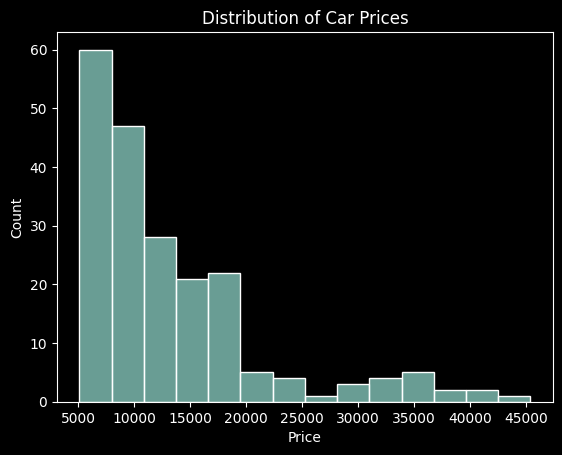

In [ ]:
sns.histplot(cdata['price'])
plt.title('Distribution of Car Prices')
plt.xlabel('Price',color='white')
plt.ylabel('Count',color='white')
plt.style.use('dark_background')
sns.set_palette('dark')
plt.xticks(color='white')
plt.yticks(color='white')

In [ ]:
cdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    int64  
 3   fueltype          205 non-null    int64  
 4   aspiration        205 non-null    int64  
 5   doornumber        205 non-null    int64  
 6   carbody           205 non-null    int64  
 7   drivewheel        205 non-null    int64  
 8   enginelocation    205 non-null    int64  
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    int64  
 15  cylindernumber    205 non-null    int64  
 16  enginesize        205 non-null    int64  
 1

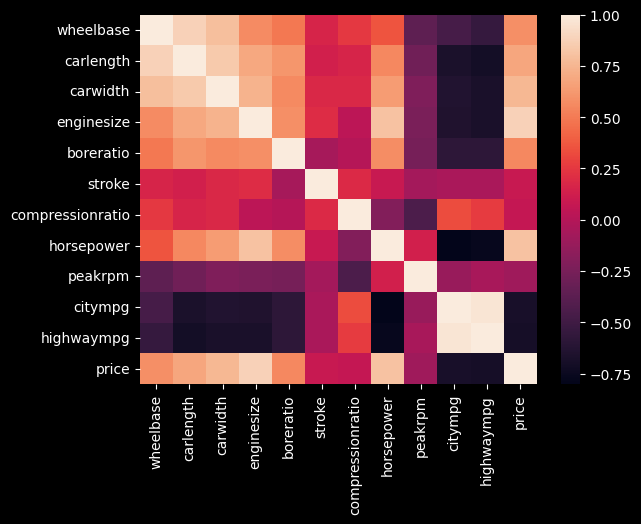

In [ ]:

numeric_col=['wheelbase','carlength','carwidth','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']
corr_matrix = cdata[numeric_col].corr()
sns.heatmap(corr_matrix)
sns.set_palette('dark')
plt.style.use('dark_background')
plt.show()

In [ ]:
x = cdata.iloc[:,:25]
y = cdata['price']

In [ ]:
x.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,1,3,2,1,0,1,0,2,0,88.6,...,2,130,5,3.47,2.68,9.0,111,5000,21,27
1,2,3,3,1,0,1,0,2,0,88.6,...,2,130,5,3.47,2.68,9.0,111,5000,21,27
2,3,1,1,1,0,1,2,2,0,94.5,...,3,152,5,2.68,3.47,9.0,154,5000,19,26
3,4,2,4,1,0,0,3,1,0,99.8,...,2,109,5,3.19,3.40,10.0,102,5500,24,30
4,5,2,5,1,0,0,3,0,0,99.4,...,1,136,5,3.19,3.40,8.0,115,5500,18,22


In [ ]:
y.head()

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [ ]:
model=LinearRegression()
model.fit(x_train,y_train)
y_predict=model.predict(x_test)
score=r2_score(y_test,y_predict)*100
score

88.34798873540217

In [ ]:
model2=Ridge()  #alpha
model2.fit(x_train,y_train)
y_predict=model2.predict(x_test)
score2=r2_score(y_test,y_predict)*100
score2

86.66662631090009

In [ ]:
model3=Lasso()
model3.fit(x_train,y_train)
y_predict=model3.predict(x_test)
score3=r2_score(y_test,y_predict)*100
score3

88.4291733938551

In [ ]:
model4=SVR(kernel='linear', gamma=0.01) # linear,poly,sigmoid,rbf
model4.fit(x_train,y_train)
y_predict=model4.predict(x_test)
score4=r2_score(y_test,y_predict)*100
score4

75.76320400904287

In [ ]:
model5=DecisionTreeRegressor()
model5.fit(x_train,y_train)
y_predict=model5.predict(x_test)
score5=r2_score(y_test,y_predict)*100
score5

90.73027561218545

In [ ]:
model7=KNeighborsRegressor(n_neighbors=3)
model7.fit(x_train,y_train)
y_predict=model7.predict(x_test)
score7=r2_score(y_test,y_predict)*100
score7

82.91727301306192

# **CONCLUSION**

AS COMPARED TO ALL THE REGRESSOR MODELS DECISIONTREE REGRESSOR ODEL HAS GIVEN THE BEST ACCURACY WITH 90
...
HENCE DECISIONTREE REGRESSOR MODEL IS THE BEST MODEL FOR THE 'CAR PRICE PREDICTION DATASET'